# Direct Oral Anticoagulant (DOAC) prescribing during COVID-19

During COVID-19, GPs have been encouraged to switch patients from Warfarin to alternative anticoagulants called Direct Oral Anticoagulants (DOACs) as they require less frequent monitoring and avoid additional visits to the GP practice. DOACs do however require renal function tests to ensure the correct dose is prescribed to avoid harm in patients. This evaluation wants to identify the proportion of patients who are at risk of harm whilst prescribed the incorrect dose of DOAC.

In [2]:
from IPython.display import HTML
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

%config InlineBackend.figure_format='png'

### The number and proportion of patients prescribed DOACs since January 2019

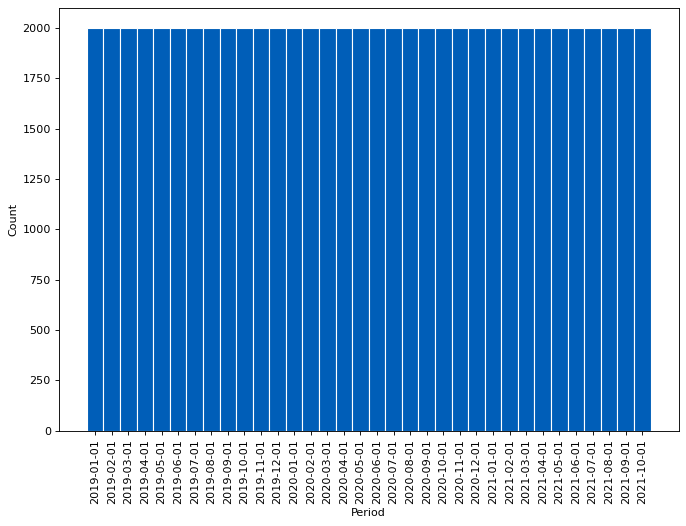

In [15]:
all_df=pd.read_csv("../output/measure_doacs_by_sex.csv", usecols=["date", "on_doac", "population"])
summary_df=all_df.groupby(["date"], as_index=False)["on_doac"].sum()
x1_coordinates=summary_df["date"]
y1_coordinates=summary_df["on_doac"]
plt.figure(figsize=(10,7), dpi=80)
plt.bar(x1_coordinates, y1_coordinates, color='#005EB8', edgecolor='white', width=1)
plt.ylabel('Count')
plt.xlabel('Period')
plt.gca()
plt.xticks(rotation=90)
plt.legend
plt.savefig(f'../output/plot_01_all.png')
plt.show()

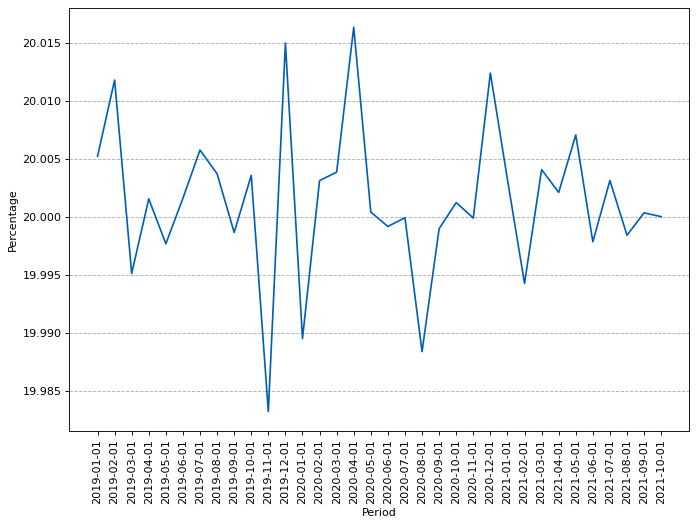

In [22]:
all_trend=pd.read_csv("../output/measure_doacs_by_sex.csv", usecols=["date", "on_doac", "value", "population"])
all_trend['value'] = 100 * all_trend['value']
summary_trend=all_trend.groupby(["date"], as_index=False)["value"].mean()
x1_coordinates=summary_trend["date"]
y1_coordinates=summary_trend["value"]
plt.figure(figsize=(10,7), dpi=80)
plt.plot(x1_coordinates, y1_coordinates, color='#005EB8')
plt.ylabel('Percentage')
plt.xlabel('Period')
plt.gca()
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="dashed")
plt.legend
plt.savefig(f'../output/plot_01_all_trend.png')
plt.show()

### The change in prescribing behaviour related to DOACs since January 2019 broken down by patient demographics 

#### 1. Number of people prescribed a DOAC by region

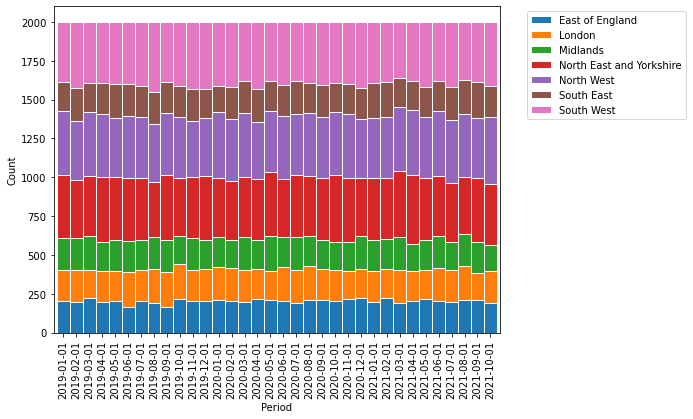

In [32]:
region_df=pd.read_csv("../output/measure_doacs_by_region.csv", usecols=["date", "region", "on_doac", "population"])
region_subset1=region_df.loc[region_df["region"] != "missing", :]
pivot_region1=region_subset1.pivot(index='date', columns='region', values='on_doac')
pivot_region1.plot.bar(stacked='true', edgecolor='white', figsize=(8,6), width=1) 
plt.ylabel('Count')
plt.xlabel('Period')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.gca()
plt.savefig(f'../output/plot_02_region.png')
plt.show()

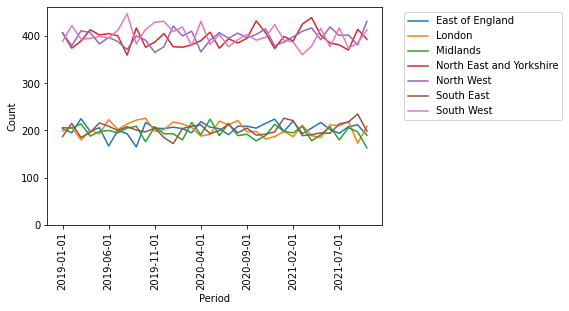

In [58]:
region_line=pd.read_csv("../output/measure_doacs_by_region.csv", usecols=["date", "region", "on_doac", "population"])
region_subset2=region_df.loc[region_df["region"] != "missing", :]
pivot_region2=region_subset2.pivot(index='date', columns='region', values='on_doac')
pivot_region2.plot.line() 
plt.ylabel('Count')
plt.xlabel('Period')
plt.ylim(ymin=0)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.gca()
plt.xticks(rotation=90)
plt.savefig(f'../output/plot_02_region_line.png')
plt.show()

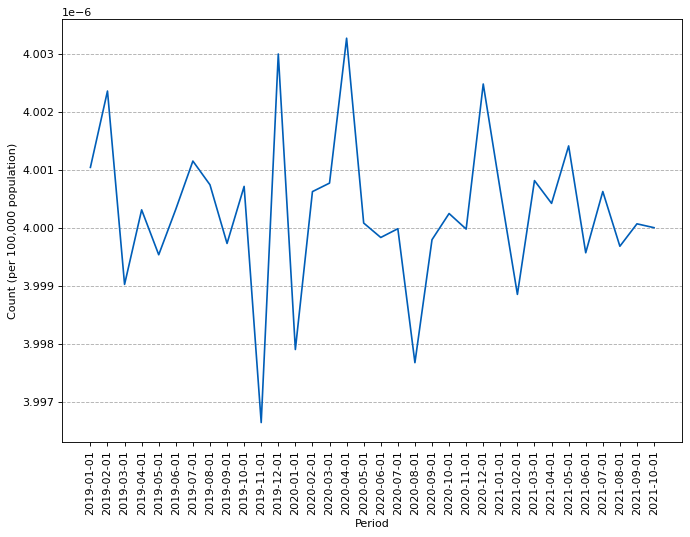

In [60]:
region_trend=pd.read_csv("../output/measure_doacs_by_sex.csv", usecols=["date", "on_doac", "value", "population"])
region_trend['on_doac'] = ((region_trend['on_doac']/region_trend['population'])/100000)
summary_region=region_trend.groupby(["date"], as_index=False)["on_doac"].sum()
x1_coordinates=summary_region["date"]
y1_coordinates=summary_region["on_doac"]
plt.figure(figsize=(10,7), dpi=80)
plt.plot(x1_coordinates, y1_coordinates, color='#005EB8')
plt.ylabel('Count (per 100,000 population)')
plt.xlabel('Period')
plt.gca()
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="dashed")
plt.legend
plt.savefig(f'../output/plot_02_region_trend.png')
plt.show()

#### 2. Number of people prescribed a DOAC by age band - excludes patients with a missing age

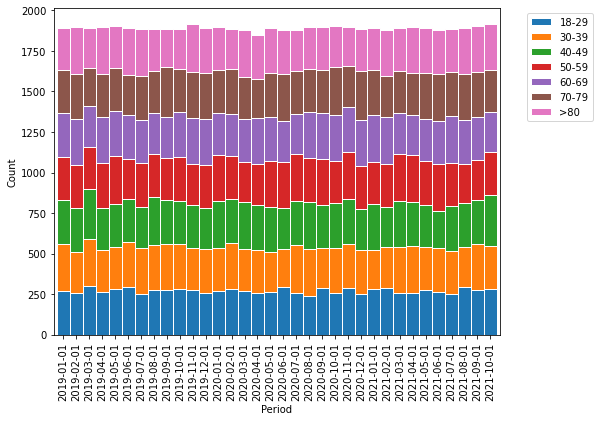

In [ ]:
age_df=pd.read_csv("../output/measure_doacs_by_age_band.csv", usecols=["date", "age_band", "on_doac", "population"])
age_subset=age_df.loc[age_df["age_band"] != 'missing', :]
pivot_age=age_subset.pivot(index='date', columns='age_band', values='on_doac')
pivot_age.plot.bar(stacked='true', edgecolor='white', figsize=(8,6), width=1)
plt.ylabel('Count')
plt.xlabel('Period')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.gca()
plt.savefig(f'../output/plot_03_age.png')
plt.show() 

#### 3. Number of people prescribed a DOAC by sex

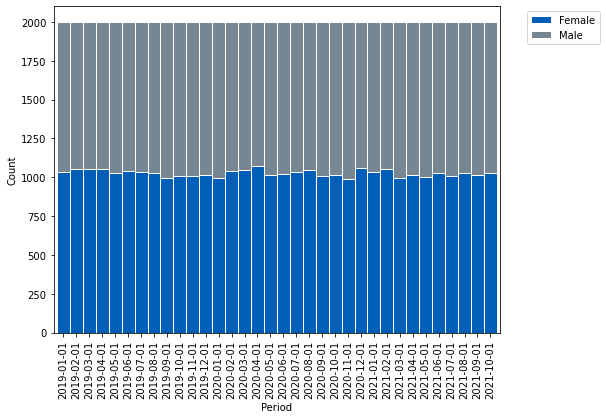

In [ ]:
sex_df=pd.read_csv("../output/measure_doacs_by_sex.csv", usecols=["date", "sex", "on_doac", "population"])
#sex_subset=sex_df.loc[region_df["sex"] != "check error code", :]
pivot_sex=sex_df.pivot(index='date', columns='sex', values='on_doac')
pivot_sex.plot.bar(stacked='true', color=('#425563', '#768692'), edgecolor='white', figsize=(8,6), width=1) 
plt.ylabel('Count')
plt.xlabel('Period')
plt.legend(["Female", "Male"], bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.gca()
plt.savefig(f'../output/plot_04_sex.png')
plt.show() 

#### 4. Number of people prescribed a DOAC identified as a 'caregiver'

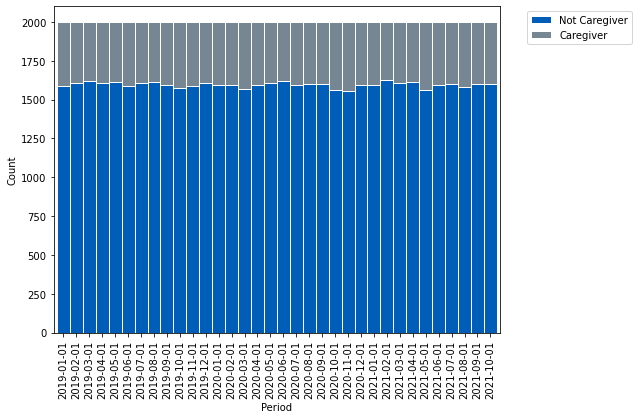

In [ ]:
carer_df=pd.read_csv("../output/measure_doacs_by_carer1.csv", usecols=["date", "carer", "on_doac", "population"])
pivot_carer = carer_df.pivot(index='date', columns='carer', values='on_doac')
pivot_carer.plot.bar(stacked='true', color=('#425563', '#768692'), edgecolor='white', figsize=(8,6), width=1)
plt.ylabel('Count')
plt.xlabel('Period')
plt.legend(["Not Caregiver", "Caregiver"], bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.gca()
plt.savefig(f'../output/plot_05_carer.png')
plt.show() 

### The proportion of patients on a DOAC who have a specific event recorded in the last 12 months

#### a. Proportion of people prescribed a DOAC with weight recorded in the last 12 months

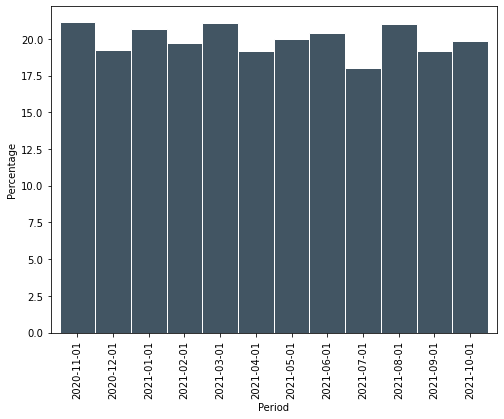

In [ ]:
weight_df=pd.read_csv("../output/measure_doacs_with_weight_recorded.csv", usecols=["date", "weight_recorded", "on_doac", "value"])
weight_df['value'] = 100 * weight_df['value']
weight_subset=weight_df.loc[(weight_df["on_doac"] != 0) & (weight_df["date"] >= '2020-11-01'), :]
pivot_weight = weight_subset.pivot(index='date', columns='on_doac', values='value')
pivot_weight.plot.bar(color=('#425563'), edgecolor='white', figsize=(8,6), width=1, legend='')
plt.ylabel('Percentage')
plt.xlabel('Period')
plt.gca()
plt.savefig(f'../output/plot_06_weight.png')
plt.show() 

#### b. Proportion of people prescribed a DOAC with egfr recorded in the last 12 months

Why this matters? Direct oral anticoagulants (DOACs) depend on estimated glomerular filtration rate (eGFR), whose estimation is crucial for optimal risk/benefit balance.

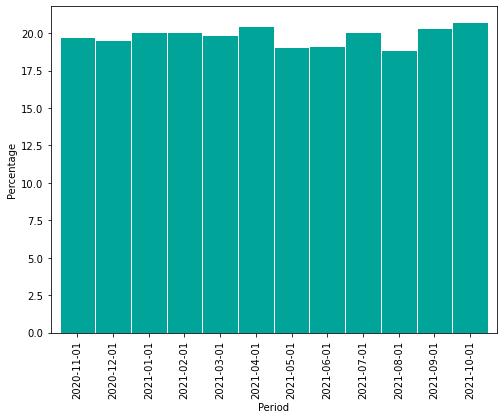

In [ ]:
egfr_df=pd.read_csv("../output/measure_doacs_with_egfr_recorded.csv", usecols=["date", "egfr_recorded", "on_doac", "population", "value"])
egfr_df['value'] = 100 * egfr_df['value']
egfr_subset=egfr_df.loc[(egfr_df["on_doac"] != 0) & (egfr_df["date"] >= '2020-11-01'), :]
pivot_egfr = egfr_subset.pivot(index='date', columns='on_doac', values='value')
pivot_egfr.plot.bar(color=('#00A499'), edgecolor='white', figsize=(8,6), width=1, legend='')
plt.ylabel('Percentage')
plt.xlabel('Period')
plt.gca()
plt.savefig(f'../output/plot_07_egfr.png')

#### c. Proportion of people prescribed a DOAC with serum creatinine recorded in the last 12 months

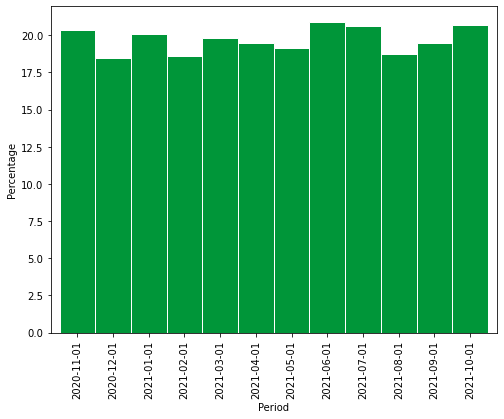

In [ ]:
sc_df=pd.read_csv("../output/measure_doacs_with_serumcreatinine_recorded.csv", usecols=["date", "serumcreatinine_recorded", "on_doac", "population", "value"])
sc_df['value'] = 100 * sc_df['value']
sc_subset=sc_df.loc[(sc_df["on_doac"] != 0) & (sc_df["date"] >= '2020-11-01'), :]
pivot_sc = sc_subset.pivot(index='date', columns='on_doac', values='value')
pivot_sc.plot.bar(color=('#009639'), edgecolor='white', figsize=(8,6), width=1, legend='')
plt.ylabel('Percentage')
plt.xlabel('Period')
plt.gca()
plt.savefig(f'../output/plot_08_serumcreatinine.png')

#### d. Proportion of people prescribed a DOAC with creatinine clearance (cr/cl) recorded in the last 12 months

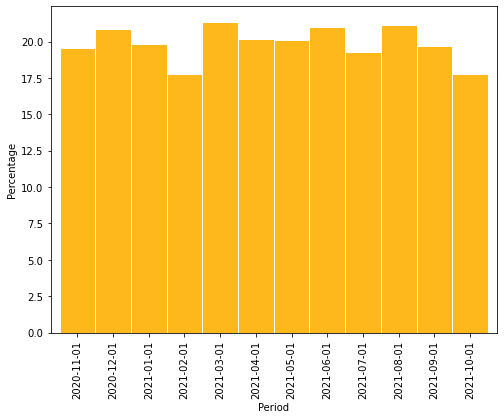

In [ ]:
crcl_df=pd.read_csv("../output/measure_doacs_with_crcl_recorded.csv", usecols=["date", "crcl_recorded", "on_doac", "population", "value"])
crcl_df['value'] = 100 * crcl_df['value']
crcl_subset=crcl_df.loc[(crcl_df["on_doac"] != 0) & (crcl_df["date"] >= '2020-11-01'), :]
pivot_crcl = crcl_subset.pivot(index='date', columns='on_doac', values='value')
pivot_crcl.plot.bar(color=('#FFB81C'), edgecolor='white', figsize=(8,6), width=1, legend='')
plt.ylabel('Percentage')
plt.xlabel('Period')
plt.gca()
plt.savefig(f'../output/plot_09_crcl.png')